<a href="https://colab.research.google.com/github/herysedra/ady_cov/blob/master/scr/tabilao/Tabilao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas.testing as tm


tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")


tilyvoafar = tilyvoa.groupby('Faritra')
tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)

tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)


tilyvoatana = tilyvoafar.get_group('Antananarivo')
tilyvoatana.set_index('Daty', inplace=True)

tilyvoatana.index = pd.to_datetime(tilyvoatana.index)

tilyvoatoa = tilyvoafar.get_group('Toamasina')
tilyvoatoa.set_index('Daty', inplace=True)

tilyvoatoa.index = pd.to_datetime(tilyvoatoa.index)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


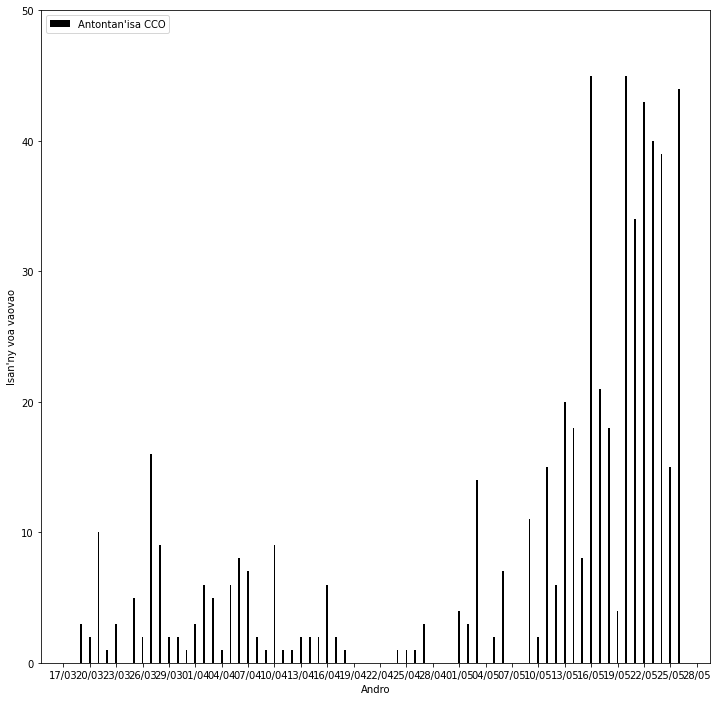

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.index, tilyvoamdg['Voatomb'], width = 0.2, color='black',label="Antontan'isa CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,50)
plt.savefig(path_to_save+'voavaozao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


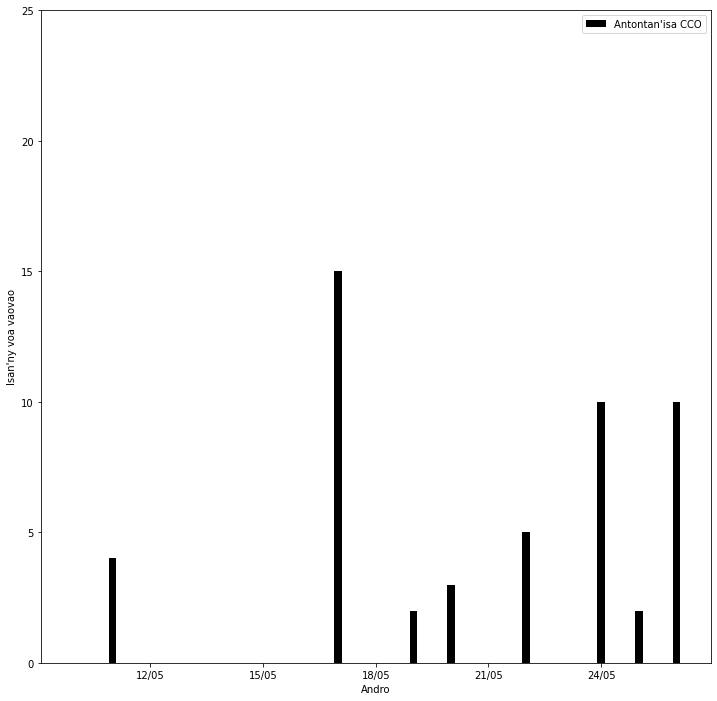

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatana.index, tilyvoatana['Voatomb'], width=0.2, color='black',label="Antontan'isa CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,25)
plt.savefig(path_to_save+'voavaotanazao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


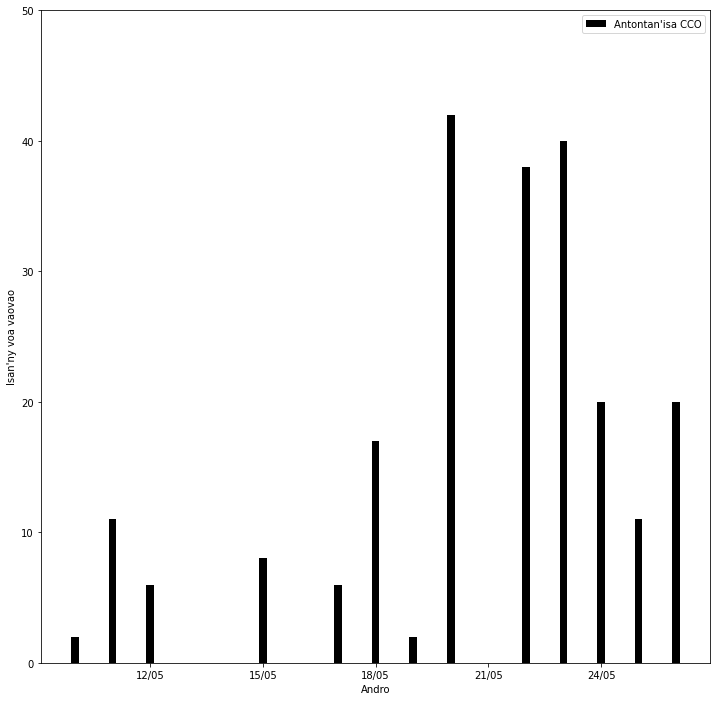

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatoa.index, tilyvoatoa['Voatomb'], width=0.2, color='black',label="Antontan'isa CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,50)
plt.savefig(path_to_save+'voavaotoazao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


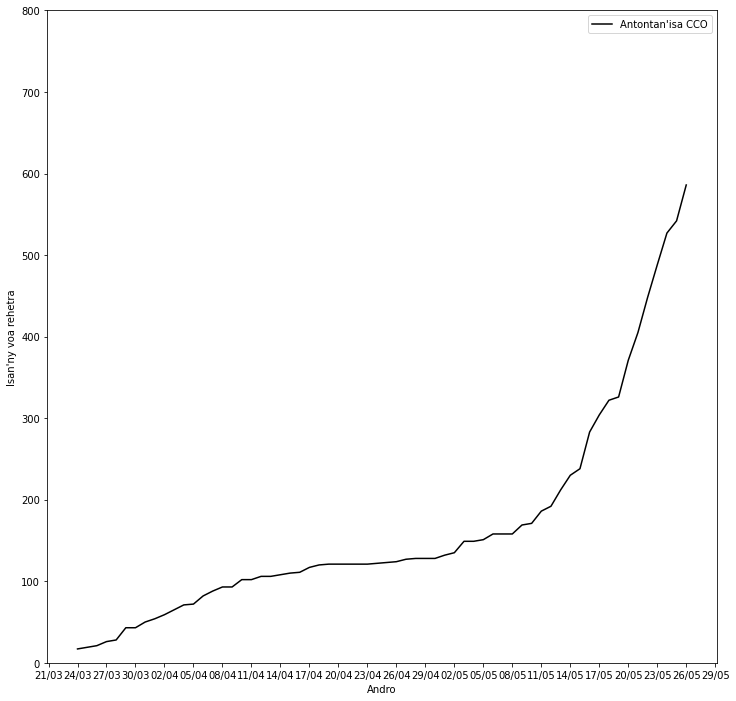

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Voareh tvm'], color='black',label="Antontan'isa CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,800)
plt.savefig(path_to_save+'voarehzao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


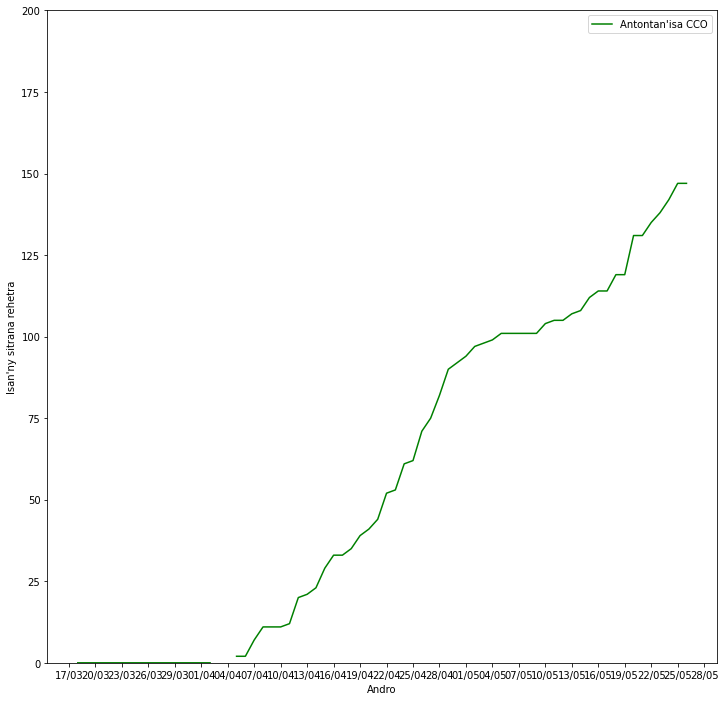

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Sitranreh tvm'], color='green',label="Antontan'isa CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,200)
plt.savefig(path_to_save+'sitrrehzao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


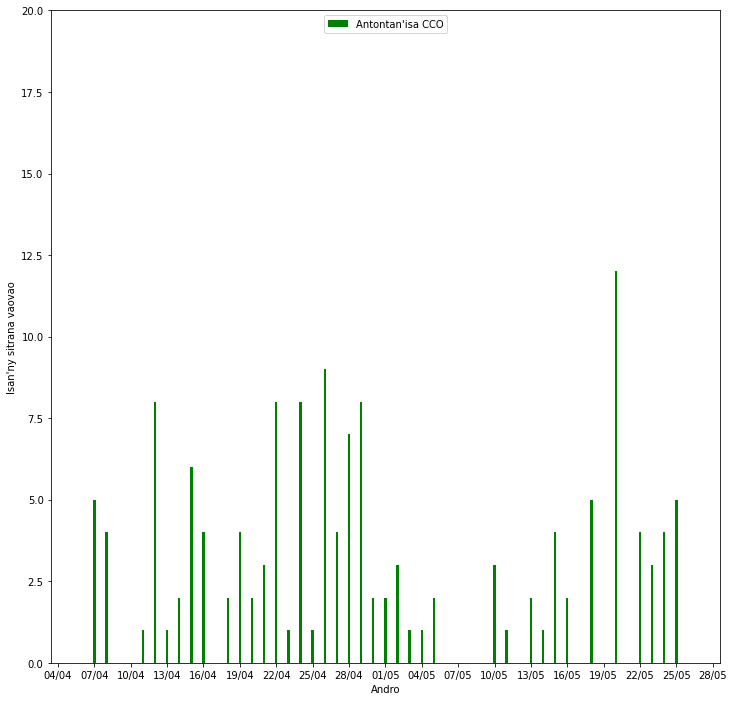

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.index, tilyvoamdg['Sitranvao tvm'], width=0.2, color='green',label="Antontan'isa CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20)
plt.savefig(path_to_save+'sitrvaozao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


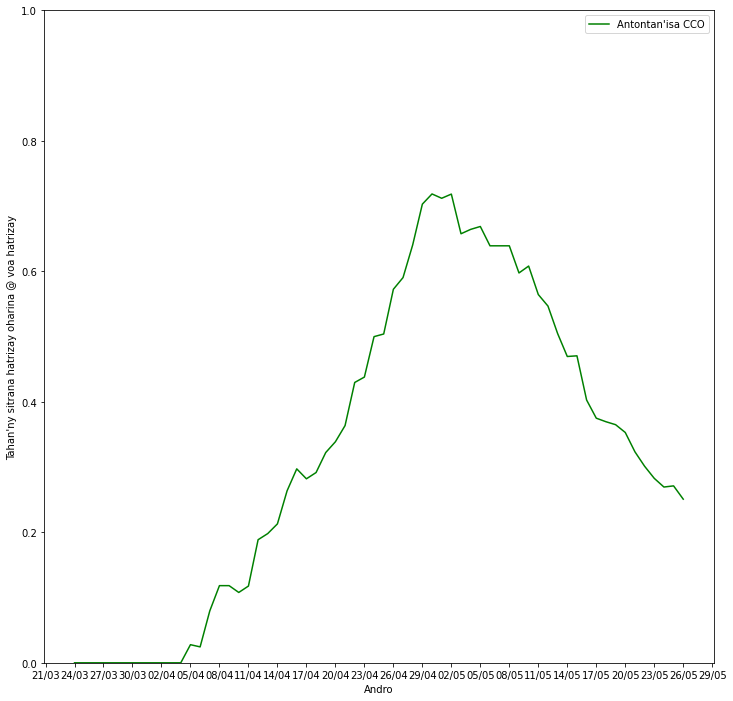

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.index, tilyvoamdg['Tahasitr'], color='green',label="Antontan'isa CCO")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny sitrana hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1)
plt.savefig(path_to_save+'tahasitrzao.eps')

plt.show()

In [0]:
tilyvoamdg['Mombatahasitr'] = np.where(tilyvoamdg['Tahasitr']>=0.5, 'tahabe', 'tahakely')

In [0]:
res = [tilyvoamdg['Tahasitr'][i + 1] - tilyvoamdg['Tahasitr'][i] for i in range(len(tilyvoamdg['Tahasitr'])-1)] 

In [0]:
tilyvoamdg.loc[tilyvoamdg['Mombatahasitr'] == 'tahabe']

In [0]:
tilyvoamdg.loc[tilyvoamdg['Tahasitr'] == np.nanmax(tilyvoamdg['Tahasitr'])]

In [0]:
tilyvoamdg.loc[tilyvoamdg['Mombatahasitr'] == 'tahakely']